# MLOps con MLflow

#### Get data

In [1]:
# load the dataset from pycaret
from pycaret.datasets import get_data
import mlflow

In [2]:
data = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


#### Preprocessing

In [3]:
# Set a valid experiment name
experiment_name = 'diamond_experiment'

# Create the experiment
#mlflow.create_experiment(experiment_name)

# Initialize MLflow with the experiment name
#mlflow.set_experiment(experiment_name)

In [4]:
from pycaret.regression import *

# Perform setup with PyCaret
s = setup(data, 
          target='Price', 
          transform_target=True, 
          log_experiment=True, 
          experiment_name=experiment_name)

,Description,Value
0,Session id,4822
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


#### Model Training

In [5]:
# compare all models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,665.1208,1840344.7995,1343.6685,0.9831,0.0680,0.0507,0.1510
lightgbm,Light Gradient Boosting Machine,630.3785,1830414.8737,1324.2118,0.9830,0.0650,0.0483,0.3280
et,Extra Trees Regressor,747.0422,2306375.7330,1498.4095,0.9786,0.0780,0.0583,0.5680
rf,Random Forest Regressor,739.0171,2329412.9495,1499.0692,0.9784,0.0770,0.0574,0.4920
gbr,Gradient Boosting Regressor,774.1224,2638247.4859,1588.8035,0.9756,0.0768,0.0575,0.1910
dt,Decision Tree Regressor,959.6914,4027368.6473,1982.0454,0.9629,0.1034,0.0751,0.1050
ada,AdaBoost Regressor,2077.7755,17873237.3183,4200.5099,0.8362,0.1884,0.1526,0.2210
knn,K Neighbors Regressor,3051.4721,36414088.7643,6021.8961,0.6614,0.3605,0.2293,0.1280
omp,Orthogonal Matching Pursuit,3304.4696,72266609.4473,8258.5808,0.3358,0.2796,0.2197,0.0960
lasso,Lasso Regression,6754.4475,121531072.2630,11004.6058,-0.1246,0.7219,0.5775,0.1050


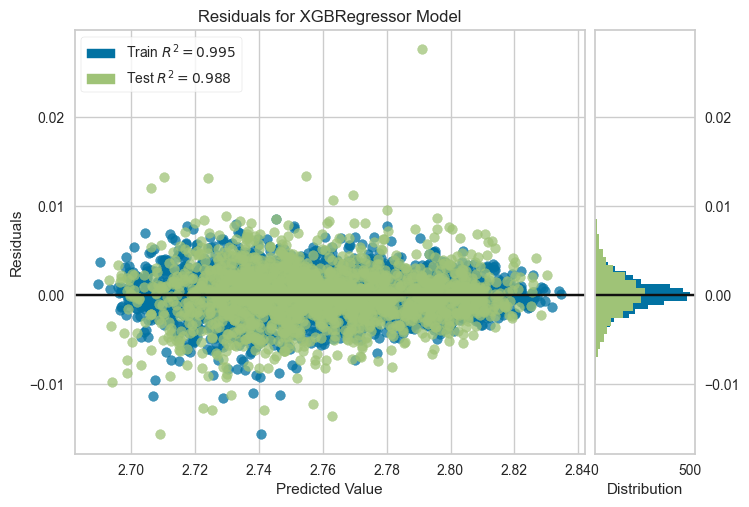

In [6]:
# check the residuals of trained model
plot_model(best, plot = 'residuals')

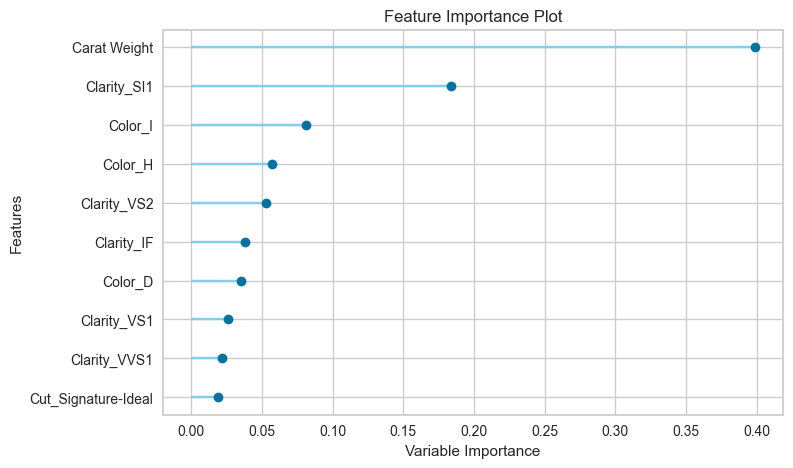

In [7]:
# check feature importance
plot_model(best, plot = 'feature')

In [8]:
# finalize the model
final_best = finalize_model(best)

# save model to disk
save_model(final_best, 'models/diamond-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'P...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                             

### Model management with MLFlow

In [9]:
# within notebook (notice ! sign infront)
!mlflow ui

^C


INFO:waitress:Serving on http://127.0.0.1:5000


In [ ]:
#localhost:5000

### Consume the model

In [ ]:
import mlflow
logged_model = "mlruns/268513964784011036/1b8feda13eb84c79ba94bc3233ae1c60/artifacts/model/model"

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(data))

In [26]:
# print pipeline
print(loaded_model)

mlflow.pyfunc.loaded_model:
  artifact_path: model
  flavor: mlflow.sklearn
  run_id: 1b8feda13eb84c79ba94bc3233ae1c60



In [28]:
pipeline = load_model('C:/Users/Caplogy_Data_002/Exercices/workspace2/mlruns/268513964784011036/1b8feda13eb84c79ba94bc3233ae1c60/artifacts/model/model')

Transformation Pipeline and Model Successfully Loaded


In [29]:
# print pipeline
print(pipeline)

Pipeline(memory=FastMemory(location=C:\Users\CAPLOG~1\AppData\Local\Temp\joblib),
         steps=[('target_transformation',
                 TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                ('numerical_imputer',
                 TransformerWrapper(include=['Carat Weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 Transformer...
NaN    -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                             'Polish', 'Symmetry'],
                                    transformer=OneHotEncoder(cols=['Cut',
                                                                    'Color',
                                                                    'Clarity',
                                                                    'Polis

In [30]:
data = get_data('diamond')

# create a copy of data and drop Price
data2 = data.copy()
data2.drop('Price', axis=1, inplace=True)

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [ ]:
# generate predictions
from pycaret.regression import predict_model
predictions = predict_model(pipeline, data=data2)
predictions.head()

<img src="images/image1.jpeg"/>